In [91]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [92]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=['EIN', 'NAME'], inplace=True)
application_df.head(5)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

# ------------------ Pre-process Input Columns ------------------

### APPLICATION_TYPE

In [93]:
# Determine which values to replace if counts are less than ...?
application_counts = application_df['APPLICATION_TYPE'].value_counts()

replace_application = list(application_counts[application_counts < 1000].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

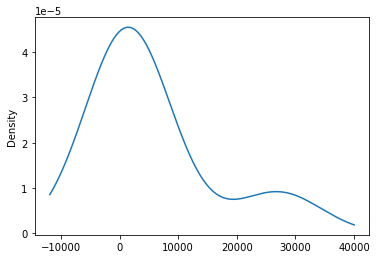

In [5]:
application_counts = application_df['APPLICATION_TYPE'].value_counts()
application_counts.plot.density()

### AFFILIATION

In [6]:
application_df['AFFILIATION'].value_counts()

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

In [94]:
# Determine which values to replace if counts are less than ..?
affiliation_counts = application_df['AFFILIATION'].value_counts()
replace_class = list(affiliation_counts[affiliation_counts < 1500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.AFFILIATION = application_df.AFFILIATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.AFFILIATION.value_counts()

Independent         18480
CompanySponsored    15705
Other                 114
Name: AFFILIATION, dtype: int64

<AxesSubplot:ylabel='Density'>

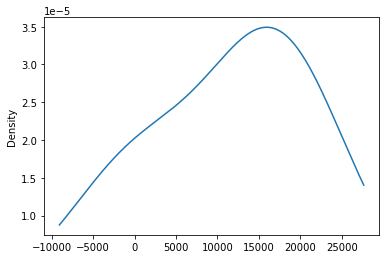

In [8]:
affiliation_counts = application_df['AFFILIATION'].value_counts()
affiliation_counts.plot.density()

### CLASSIFICATION

In [9]:
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [95]:
classification_counts = application_df['CLASSIFICATION'].value_counts()
replace_class = list(classification_counts[classification_counts < 2000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
Other     6062
C1200     4837
Name: CLASSIFICATION, dtype: int64

<AxesSubplot:ylabel='Density'>

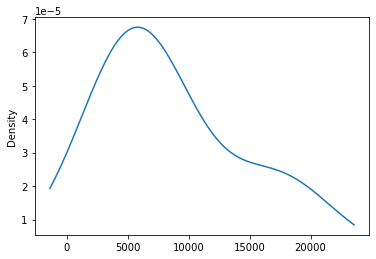

In [11]:
classification_counts = application_df['CLASSIFICATION'].value_counts()
classification_counts.plot.density()

### USE_CASE

In [12]:
application_df['USE_CASE'].value_counts()

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

In [96]:
# Determine which values to replace if counts are less than ..?
use_case_counts = application_df['USE_CASE'].value_counts()
replace_class = list(use_case_counts[use_case_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.USE_CASE = application_df.USE_CASE.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.USE_CASE.value_counts()

Preservation    28095
ProductDev       5671
Other             533
Name: USE_CASE, dtype: int64

<AxesSubplot:ylabel='Density'>

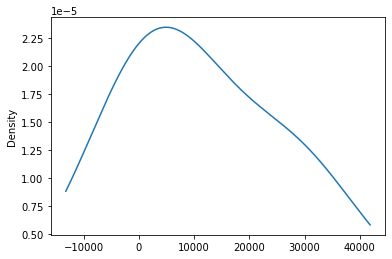

In [14]:
use_case_counts = application_df['USE_CASE'].value_counts()
use_case_counts.plot.density()

### ORGANIZATION

In [15]:
application_df['ORGANIZATION'].value_counts()

Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64

In [97]:
# Determine which values to replace if counts are less than ..?
organization_counts = application_df['ORGANIZATION'].value_counts()
replace_class = list(organization_counts[organization_counts < 3000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.ORGANIZATION = application_df.ORGANIZATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.ORGANIZATION.value_counts()

Trust          23515
Association    10255
Other            529
Name: ORGANIZATION, dtype: int64

<AxesSubplot:ylabel='Density'>

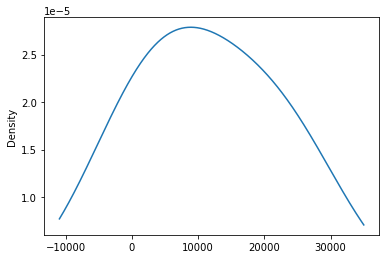

In [17]:
organization_counts = application_df['ORGANIZATION'].value_counts()
organization_counts.plot.density()

### INCOME_AMT

In [18]:
application_df['INCOME_AMT'].value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [98]:
# Determine which values to replace if counts are less than ..?
income_amt_counts = application_df['INCOME_AMT'].value_counts()
replace_class = list(income_amt_counts[income_amt_counts < 3000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.INCOME_AMT = application_df.INCOME_AMT.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.INCOME_AMT.value_counts()

0                24388
25000-99999       3747
100000-499999     3374
Other             2790
Name: INCOME_AMT, dtype: int64

<AxesSubplot:ylabel='Density'>

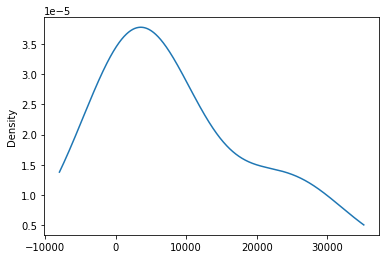

In [20]:
income_amt_counts = application_df['INCOME_AMT'].value_counts()
income_amt_counts.plot.density()

In [21]:
#application_df = application_df.loc[ (application_df['ASK_AMT'] <= 5_500) , :]

In [99]:
application_df.drop(columns=['SPECIAL_CONSIDERATIONS','STATUS','ASK_AMT'], axis=1, inplace=True)

In [23]:
application_df.head(5)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,Other,Independent,C1000,ProductDev,Association,0,5000,1
1,T3,Independent,C2000,Preservation,Other,Other,108590,1
2,T5,CompanySponsored,Other,ProductDev,Association,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,Other,6692,1
4,T3,Independent,C1000,Other,Trust,100000-499999,142590,1


# ------------------ Encode, Scale, Split ------------------

In [24]:
application_df.dtypes

APPLICATION_TYPE    object
AFFILIATION         object
CLASSIFICATION      object
USE_CASE            object
ORGANIZATION        object
INCOME_AMT          object
ASK_AMT              int64
IS_SUCCESSFUL        int64
dtype: object

In [100]:
# Generate our categorical variable lists
#application_cat = ['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION','INCOME_AMT','SPECIAL_CONSIDERATIONS']
application_cat = ['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION','INCOME_AMT']

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
#encode_df.head()

In [101]:
# Merge one-hot encoded features and drop the originals
merged_df = application_df.merge(encode_df, left_index=True, right_index=True).drop(columns=application_cat, axis=1)
merged_df.head()

,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Independent,AFFILIATION_Other,...,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Other,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_100000-499999,INCOME_AMT_25000-99999,INCOME_AMT_Other
0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [102]:
# Split our preprocessed data into our features and target arrays
y = merged_df["IS_SUCCESSFUL"].values
merged_df.drop(columns=["IS_SUCCESSFUL"], axis=1, inplace=True)
X = merged_df.values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [50]:
#from sklearn.preprocessing import MinMaxScaler
#X_train_scaled = MinMaxScaler().fit_transform(X_train)
#X_test_scaled = MinMaxScaler().fit_transform(X_test)

In [103]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [51]:
merged_df.shape

(34299, 24)

In [52]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_opt",exist_ok=True)
checkpoint_path = "checkpoints_opt/weights_2.{epoch:02d}.hdf5"

In [108]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=96, activation="tanh", input_dim=23))
nn.add(tf.keras.layers.Dense(units=96, activation="tanh"))
nn.add(tf.keras.layers.Dense(units=96, activation="tanh"))
nn.add(tf.keras.layers.Dense(units=96, activation="tanh"))
nn.add(tf.keras.layers.Dense(units=96, activation="tanh"))
nn.add(tf.keras.layers.Dense(units=96, activation="tanh"))
nn.add(tf.keras.layers.Dense(units=96, activation="tanh"))
nn.add(tf.keras.layers.Dense(units=96, activation="tanh"))

nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_130 (Dense)            (None, 96)                2304      
_________________________________________________________________
dense_131 (Dense)            (None, 96)                9312      
_________________________________________________________________
dense_132 (Dense)            (None, 96)                9312      
_________________________________________________________________
dense_133 (Dense)            (None, 96)                9312      
_________________________________________________________________
dense_134 (Dense)            (None, 96)                9312      
_________________________________________________________________
dense_135 (Dense)            (None, 96)                9312      
_________________________________________________________________
dense_136 (Dense)            (None, 96)              

In [109]:
# Compile the model
#nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [110]:
# Create a callback that saves the model's weights every epoch

cp_callback_opt = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)

# Normally we use 'save_freq', but it behaves strangely, and I could not get
# it to save every 5 epochs. The 'period' param is now deprecated, but it works.
    #save_freq='epoch')

In [111]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=1000, callbacks=[cp_callback_opt])

Epoch 1/1000
804/804 [==============================] - 2s 2ms/step - loss: 0.5876 - accuracy: 0.7167
Epoch 2/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5780 - accuracy: 0.7194
Epoch 3/1000
804/804 [==============================] - 2s 2ms/step - loss: 0.5716 - accuracy: 0.7236
Epoch 4/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5677 - accuracy: 0.7235
Epoch 5/1000
804/804 [==============================] - 2s 2ms/step - loss: 0.5686 - accuracy: 0.7234

Epoch 00005: saving model to checkpoints_opt\weights_2.05.hdf5
Epoch 6/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5656 - accuracy: 0.7242
Epoch 7/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5640 - accuracy: 0.7248
Epoch 8/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5637 - accuracy: 0.7231
Epoch 9/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5657 - accuracy: 0.7240
Epoch 10/1000
804/

804/804 [==============================] - ETA: 0s - loss: 0.5591 - accuracy: 0.73 - 1s 2ms/step - loss: 0.5597 - accuracy: 0.7302
Epoch 72/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5608 - accuracy: 0.7306
Epoch 73/1000
804/804 [==============================] - 2s 2ms/step - loss: 0.5588 - accuracy: 0.7300
Epoch 74/1000
804/804 [==============================] - 2s 2ms/step - loss: 0.5586 - accuracy: 0.7278
Epoch 75/1000
804/804 [==============================] - 2s 2ms/step - loss: 0.5587 - accuracy: 0.7295

Epoch 00075: saving model to checkpoints_opt\weights_2.75.hdf5
Epoch 76/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5602 - accuracy: 0.7299
Epoch 77/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5594 - accuracy: 0.7282
Epoch 78/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5577 - accuracy: 0.7291
Epoch 79/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5592 

804/804 [==============================] - 2s 2ms/step - loss: 0.5553 - accuracy: 0.7318

Epoch 00140: saving model to checkpoints_opt\weights_2.140.hdf5
Epoch 141/1000
804/804 [==============================] - 2s 2ms/step - loss: 0.5553 - accuracy: 0.7306
Epoch 142/1000
804/804 [==============================] - 2s 2ms/step - loss: 0.5549 - accuracy: 0.7317
Epoch 143/1000
804/804 [==============================] - 2s 2ms/step - loss: 0.5552 - accuracy: 0.7301
Epoch 144/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5562 - accuracy: 0.7289
Epoch 145/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5546 - accuracy: 0.7311

Epoch 00145: saving model to checkpoints_opt\weights_2.145.hdf5
Epoch 146/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5549 - accuracy: 0.7311
Epoch 147/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5576 - accuracy: 0.7291
Epoch 148/1000
804/804 [=============================

804/804 [==============================] - 1s 2ms/step - loss: 0.5565 - accuracy: 0.7302
Epoch 209/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5556 - accuracy: 0.7307
Epoch 210/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5578 - accuracy: 0.7293

Epoch 00210: saving model to checkpoints_opt\weights_2.210.hdf5
Epoch 211/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5558 - accuracy: 0.7308
Epoch 212/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5555 - accuracy: 0.7315
Epoch 213/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7300
Epoch 214/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5567 - accuracy: 0.7280
Epoch 215/1000
804/804 [==============================] - 2s 2ms/step - loss: 0.5558 - accuracy: 0.7286

Epoch 00215: saving model to checkpoints_opt\weights_2.215.hdf5
Epoch 216/1000
804/804 [=============================

KeyboardInterrupt: 